In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import tqdm
import numba
import pickle
import matplotlib
import numpy as np
import pandas as pd
import ase.io as aio
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from toolz.curried import pipe, curry, compose

In [3]:
import matplotlib as mpl
scale = 8
mpl.rcParams['figure.figsize'] = [scale * 1.61803398, scale]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [13]:
import plot
import atommks.helpers as utils

In [14]:
runs = np.loadtxt("runs.txt").astype(int)
runs.shape

(77,)

In [15]:
def rgb2gray(rgb):
    """
    convert a 3 chanel rgb image to grey scale
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


@numba.njit()
def get_image(arr, cx, cy, pts):
    for ix in range(len(pts)):
        arr[cx[ix], cy[ix]] += pts[ix]
    return arr

get_range = lambda x: np.max(x) - np.min(x)

gen_coords = curry(lambda x, dx: np.round(((x - np.min(x)) / (np.max(x) - np.min(x))) * dx).astype(int))

get_vals = compose(lambda df: df.values, lambda f: pd.read_csv(f))

gen_img = curry(lambda val, dx: get_image(np.zeros([dx+1]*2), 
                                          gen_coords(val[:,1], dx), 
                                          gen_coords(val[:,2], dx), 
                                          val[:,3]))



Cu_ACC_0.csv


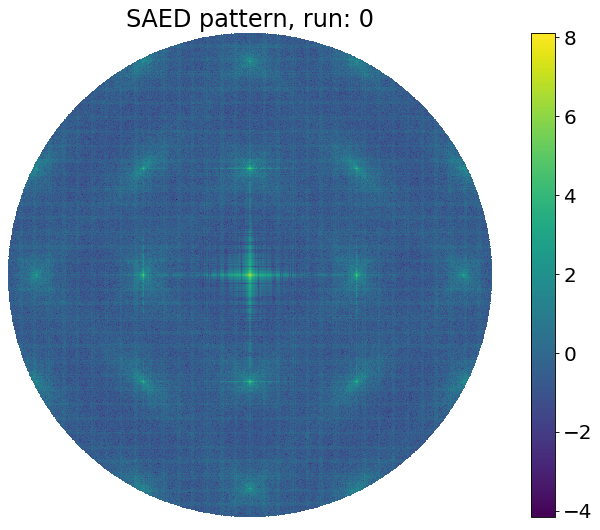

CPU times: user 12.7 s, sys: 764 ms, total: 13.4 s
Wall time: 2.37 s


In [22]:
%%time
ix = 0
fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(runs[ix])
print(fname.split("/")[-1])
arr = gen_img(get_vals(fname), dx=2048)
plot.draw_2d(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))

In [18]:
csv = pd.read_csv(fname)
pt0 = csv["Points:0"]
pt1 = csv["Points:1"]
pt2 = csv["Points:2"]
print(get_range(pt0))
print(get_range(pt1))
print(get_range(pt2))

0.019609
2.498
2.498


Cu_ACC_38000.csv


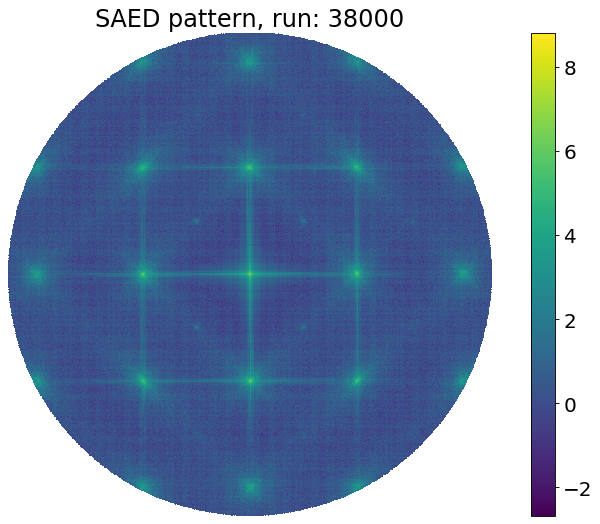

CPU times: user 10.3 s, sys: 632 ms, total: 10.9 s
Wall time: 2.22 s


In [25]:
%%time
ix = -1
fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(runs[ix])
print(fname.split("/")[-1])
arr = gen_img(get_vals(fname), dx=1024)
plot.draw_2d(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))


# save SAED patterns as 2D arrays for all structures

In [34]:
deltax= 512
# folder_saed = "data/saeds_1024"
folder_saed = "data/saeds_{}".format(deltax)
if not os.path.exists(folder_saed):
    os.mkdir(folder_saed)

In [35]:
get_fout = lambda f_in, dx: os.path.join(folder_saed, f_in.split("/")[-1][:-4]+"_{}_saed.pkl".format(dx))

def csv_to_img(run, dx=deltax):
    fname = "../new-data/CK_Cu_ACC_SAED_CSV/Cu_ACC_{}.csv".format(run)
    utils.save_file(get_fout(fname, dx), 
                gen_img(get_vals(fname), 
                        dx=dx))

In [36]:
%%time
import multiprocessing as mp

n_proc = 10

with mp.Pool(n_proc) as P:
    P.map(csv_to_img, runs)

CPU times: user 29.1 ms, sys: 141 ms, total: 170 ms
Wall time: 24.9 s


(1025, 1025)


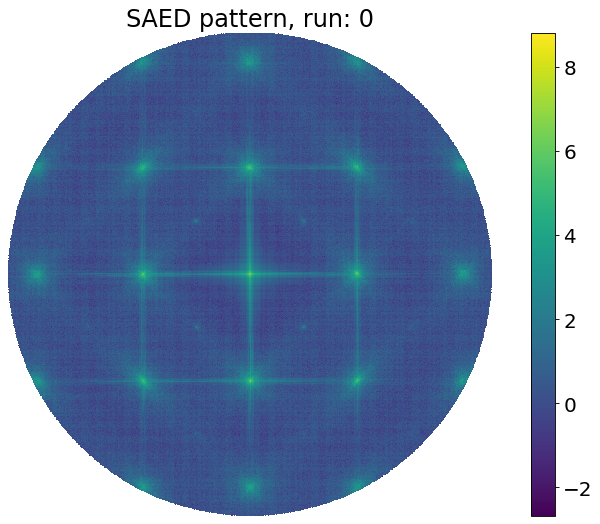

In [40]:
dx = 1024
ix = 0
img = utils.load_file("data/saeds_{}/Cu_ACC_{}_{}_saed.pkl".format(dx, runs[ix], dx))

print(img.shape)


plot.draw_2d(np.log10(arr), 
              "SAED pattern, run: {}".format(runs[ix]))